In [1]:
import os
import scipy.io
import numpy as np
from scipy import signal

data_path = "/kaggle/input/control1"
lowcut = 0.4 
highcut = 100 
fs_original = 500
fs_new = 250

control_data = []
control_path = os.path.join(data_path, 'Control')

for foldername in os.listdir(control_path):
    subfolder_path = os.path.join(control_path, foldername)
    control_data.append(subfolder_path)

Control30 = []

for control_data_path in control_data:
    n_epochs = 70 
    start_epoch = 1
    end_epoch = 110

    control_arr = []

    for i in range(start_epoch, end_epoch+1):
        epoch_path = os.path.join(control_data_path, f"trial{i}.mat")
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]    
        #print(mat_data1.shape)
        # Downsampling
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        #print(downsampled_data.shape)
        
        control_arr.append(downsampled_data)
        Control30.append(downsampled_data)

Control30 = np.array(Control30)

print(Control30.shape)


(3300, 60, 1000)


In [2]:
from scipy.stats import entropy

# alpha_band = (8, 12)
# beta_band = (12, 35)
# delta_band = (.5, 4)
# epsilon = 1e-10

# Control_feature = np.zeros((Control30.shape[0], Control30.shape[1], Control30.shape[2] + 4))

# for i in range(Control30.shape[0]):
#     for j in range(Control30.shape[1]):
#         channel_data = Control30[i, j, :]
#         freq_spectrum = np.fft.fft(channel_data)
#         power_spectrum = np.abs(freq_spectrum) ** 2

#         alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
#         beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
#         delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

#         channel_min_value = np.min(channel_data)
#         channel_max_value = np.max(channel_data)

#         power_spectrum_adjusted = power_spectrum + epsilon
#         entropy_values = entropy(power_spectrum_adjusted)
#         values = np.array([alpha_power, beta_power, delta_power, entropy_values])
#         rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
#         concatenated_data = np.concatenate((channel_data, rescaled_values))

#         Control_feature[i, j, :-4] = channel_data
#         Control_feature[i, j, -4:] = rescaled_values

# print(Control_feature.shape)


epsilon = 1e-8  

alpha_band = (8, 12)
beta_band = (12, 30)
delta_band = (0.5, 4)

num_samples = Control30.shape[0]
num_channels = Control30.shape[1]

features_control = np.zeros((num_samples, num_channels, 4))

for sample_idx in range(num_samples):
    for channel_idx in range(num_channels):
        channel_data = Control30[sample_idx, channel_idx, :]

        freq_spectrum = np.fft.fft(channel_data)
        power_spectrum = np.abs(freq_spectrum) ** 2

        alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
        beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
        delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

        channel_min_value = np.min(channel_data)
        channel_max_value = np.max(channel_data)

        power_spectrum_adjusted = power_spectrum + epsilon
        entropy_values = entropy(power_spectrum_adjusted)

        features_control[sample_idx, channel_idx, 0] = alpha_power
        features_control[sample_idx, channel_idx, 1] = beta_power
        features_control[sample_idx, channel_idx, 2] = delta_power
        features_control[sample_idx, channel_idx, 3] = entropy_values

print(features_control.shape)


(3300, 60, 4)


In [3]:
import os
import scipy.io
import numpy as np
from scipy import signal
data_path = "/kaggle/input/concussed1"
lowcut = 0.4 
highcut = 100 
fs_original = 500
fs_new = 250  

concussed_data = []
concussed_path = os.path.join(data_path, 'Concussed')
for foldername in os.listdir(concussed_path):
    subfolder_path = os.path.join(concussed_path, foldername)
    concussed_data.append(subfolder_path)

Concussed52 = []
for concussed_data_path in concussed_data:
    n_epochs = 70
    start_epoch = 1
    end_epoch = 110
    concussed_arr = []

    for i in range(start_epoch, end_epoch+1):
        epoch_path = f"{concussed_data_path}/trial{i}.mat"
        mat_data = scipy.io.loadmat(epoch_path)
        mat_data1 = mat_data["trialData_i"]
        num_samples_original = mat_data1.shape[-1]
        num_samples_new = int(num_samples_original * fs_new / fs_original)
        downsampled_data = signal.resample(mat_data1, num_samples_new, axis=-1)
        
        concussed_arr.append(np.array(downsampled_data))
        
        Concussed52.append(downsampled_data)

Concussed52 = np.array(Concussed52)

print( Concussed52.shape)


(5390, 60, 1000)


In [4]:
from scipy.stats import entropy

# alpha_band = (8, 12)
# beta_band = (12, 35)
# delta_band = (.5, 4)
# epsilon = 1e-10

# Concussed_feature = np.zeros((Concussed52.shape[0], Concussed52.shape[1], Concussed52.shape[2] + 4))

# for i in range(Concussed52.shape[0]):
#     for j in range(Concussed52.shape[1]):
#         channel_data = Concussed52[i, j, :]
#         freq_spectrum = np.fft.fft(channel_data)
#         power_spectrum = np.abs(freq_spectrum) ** 2

#         alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
#         beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
#         delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

#         channel_min_value = np.min(channel_data)
#         channel_max_value = np.max(channel_data)

#         power_spectrum_adjusted = power_spectrum + epsilon
#         entropy_values = entropy(power_spectrum_adjusted)
#         values = np.array([alpha_power, beta_power, delta_power, entropy_values])
#         rescaled_values = (values - values.min()) * (channel_max_value - channel_min_value) / (values.max() - values.min()) + channel_min_value
#         concatenated_data = np.concatenate((channel_data, rescaled_values))

#         Concussed_feature[i, j, :-4] = channel_data
#         Concussed_feature[i, j, -4:] = rescaled_values

# print(Concussed_feature.shape)

epsilon = 1e-8  # Small value to avoid division by zero in entropy calculation

# Define the frequency bands
alpha_band = (8, 12)
beta_band = (12, 30)
delta_band = (0.5, 4)

num_samples = Concussed52.shape[0]
num_channels = Concussed52.shape[1]

# Initialize the feature array
features_concussed = np.zeros((num_samples, num_channels, 4))

for sample_idx in range(num_samples):
    for channel_idx in range(num_channels):
        channel_data = Concussed52[sample_idx, channel_idx, :]

        freq_spectrum = np.fft.fft(channel_data)
        power_spectrum = np.abs(freq_spectrum) ** 2

        alpha_power = np.sum(power_spectrum[(alpha_band[0] <= freq_spectrum) & (freq_spectrum <= alpha_band[1])])
        beta_power = np.sum(power_spectrum[(beta_band[0] <= freq_spectrum) & (freq_spectrum <= beta_band[1])])
        delta_power = np.sum(power_spectrum[(delta_band[0] <= freq_spectrum) & (freq_spectrum <= delta_band[1])])

        channel_min_value = np.min(channel_data)
        channel_max_value = np.max(channel_data)

        power_spectrum_adjusted = power_spectrum + epsilon
        entropy_values = entropy(power_spectrum_adjusted)

        features_concussed[sample_idx, channel_idx, 0] = alpha_power
        features_concussed[sample_idx, channel_idx, 1] = beta_power
        features_concussed[sample_idx, channel_idx, 2] = delta_power
        features_concussed[sample_idx, channel_idx, 3] = entropy_values

print(features_concussed.shape)



(5390, 60, 4)


In [5]:
dataset = np.concatenate((Control30, Concussed52), axis=0)
labels = np.concatenate((np.zeros(Control30.shape[0]), np.ones(Concussed52.shape[0])))

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Split the control and concussed data
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(Control30, np.zeros(Control30.shape[0]), test_size=0.2, random_state=42)
X_train_concussed, X_test_concussed, y_train_concussed, y_test_concussed = train_test_split(Concussed52, np.ones(Concussed52.shape[0]), test_size=0.2, random_state=42)

# Split the control and concussed features
X_train_features_control, X_test_features_control, _, _ = train_test_split(features_control, np.zeros(features_control.shape[0]), test_size=0.2, random_state=42)
X_train_features_concussed, X_test_features_concussed, _, _ = train_test_split(features_concussed, np.ones(features_concussed.shape[0]), test_size=0.2, random_state=42)

# Concatenate the data and features
X_train_eeg = np.concatenate((X_train_control, X_train_concussed))
X_test_eeg = np.concatenate((X_test_control, X_test_concussed))
X_train_features = np.concatenate((X_train_features_control, X_train_features_concussed))
X_test_features = np.concatenate((X_test_features_control, X_test_features_concussed))

# Create labels for the data
y_train = np.concatenate((y_train_control, y_train_concussed))
y_test = np.concatenate((y_test_control, y_test_concussed))

# Create model architecture
eeg_input = Input(shape=(60, 1000))
conv1 = Conv1D(64, 3, activation='relu')(eeg_input)
maxpool1 = MaxPooling1D(2)(conv1)
flatten1 = Flatten()(maxpool1)
dropout1 = Dropout(0.5)(flatten1)

feature_input = Input(shape=(60, 4))
flatten2 = Flatten()(feature_input)

concatenated = concatenate([dropout1, flatten2])
batchnorm1 = BatchNormalization()(concatenated)

dense1 = Dense(64, activation='relu')(batchnorm1)
dropout2 = Dropout(0.5)(dense1)

output = Dense(1, activation='sigmoid')(dropout2)

model = Model(inputs=[eeg_input, feature_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.5
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

# Train the model
history = model.fit([X_train_eeg, X_train_features], y_train, epochs=100, batch_size=128, validation_data=([X_test_eeg, X_test_features], y_test), callbacks=[lr_callback])

# Print accuracy
test_loss, test_accuracy = model.evaluate([X_test_eeg, X_test_features], y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
55/55 [==============================] - 9s 134ms/step - loss: 0.8071 - accuracy: 0.6053 - val_loss: 0.7039 - val_accuracy: 0.6185 - lr: 0.0010
Epoch 2/100
55/55 [==============================] - 6s 115ms/step - loss: 0.6509 - accuracy: 0.6700 - val_loss: 0.6410 - val_accuracy: 0.6663 - lr: 0.0010
Epoch 3/100
55/55 [==============================] - 6s 115ms/step - loss: 0.5725 - accuracy: 0.7136 - val_loss: 0.6048 - val_accuracy: 0.7025 - lr: 0.0010
Epoch 4/100
55/55 [==============================] - 7s 124ms/step - loss: 0.5414 - accuracy: 0.7267 - val_loss: 0.5740 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 5/100
55/55 [==============================] - 6s 116ms/step - loss: 0.5122 - accuracy: 0.7431 - val_loss: 0.5525 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 6/100
55/55 [==============================] - 6s 115ms/step - loss: 0.4822 - accuracy: 0.7665 - val_loss: 0.5469 - val_accuracy: 0.7819 - lr: 0.0010
Epoch 7/100
55/55 [==============================] - 6s 115ms/st

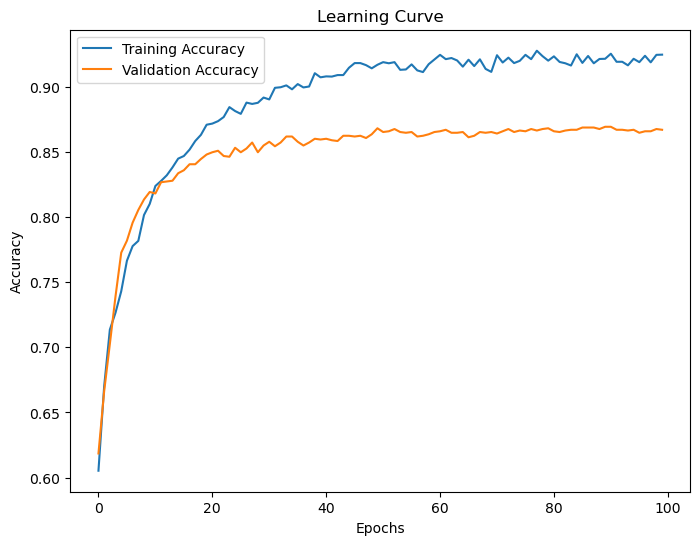

55/55 [==============================] - 1s 13ms/step
Confusion Matrix:
[[510 150]
 [ 81 997]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.82       660
         1.0       0.87      0.92      0.90      1078

    accuracy                           0.87      1738
   macro avg       0.87      0.85      0.86      1738
weighted avg       0.87      0.87      0.87      1738



In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate predictions
y_pred = model.predict([X_test_eeg, X_test_features])
y_pred_binary = np.round(y_pred).flatten()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Create classification report
cr = classification_report(y_test, y_pred_binary)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

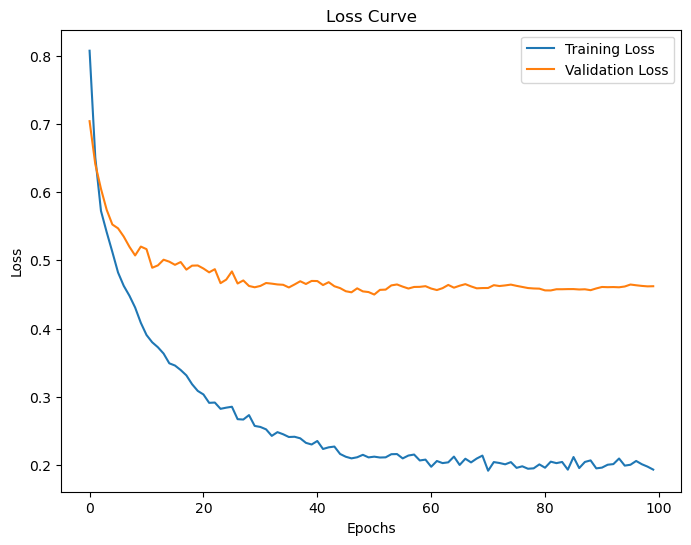

In [14]:
# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# model = Sequential()
# model.add(Conv1D(32, 3, activation='relu', input_shape=(60,1000)))
# model.add(MaxPooling1D(2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# history=model.fit(X_train, y_train, epochs=100, batch_size=32)


In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100))


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Control', 'Concussed']
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(report)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ['Control', 'Concussed']
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(report)
cm = confusion_matrix(y_test, y_pred)

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cm, fmt='', annot=labels, cmap='Greens')
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

X_test_norm = (X_test - mean) / std
y_pred_prob = model.predict(X_test_norm)

y_pred_prob_positive = y_pred_prob[:, 0]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)
roc_auc = roc_auc_score(y_test, y_pred_prob_positive)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
